In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('C:/Users/stanl/Downloads/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking for missing values
null_values = df.isnull().sum()

In [4]:
null_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#basic info look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#surveying the data types so i will know which to encode 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# it has got 2 missing values, so i'll drop the two rows that are missing, doesn't seem large in the grand scheme of things
df.dropna(subset=["Embarked"], inplace=True)

In [8]:
# Group by 'Pclass' and 'Sex' and fill missing 'Age' with the median
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [9]:
# Yeah i'm just going to look at the correlation matrix here. A simple df.corr() would be troublesome as some of the data are objects
correlation = df.select_dtypes(include=['number']).corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.036233,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.064411,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.410697,0.081656,0.016824,-0.548193
Age,0.036233,-0.064411,-0.410697,1.000000,-0.249161,-0.174541,0.119859
SibSp,-0.057686,-0.034040,0.081656,-0.249161,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.174541,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.119859,0.160887,0.217532,1.000000


In [10]:
print(df['Age'].isnull().sum())  # Should print 0

0


In [11]:
#dropping columns i don't feel will be necessary for this predictive model
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], inplace=True, axis=1)

In [12]:
# I didn't feel the need to drop this, maybe i felt it could be somewhat important for survivability
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
# ok we're going to encode data and i'll start with sex. instead of label encoding, i'll use .map() method
df["Sex"] = df["Sex"].map({'male':1, 'female':0})

In [14]:
# and one-hot encoder for the Embarked feature, especially as it consists of three unique values
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [15]:
# splitting
X = df.drop(columns=['Survived'])
y = df['Survived']

In [16]:
# 80% to train and 20% to test...and yes i'm breaking from the random state as 42 cycle (which already was a reference to The Hitchiker's
#Guide to the Galaxy) and using 451, a pop culture reference to system shock 2(1994) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=451)

In [17]:
# fitting the model into logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=451)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=451)

In [18]:
# It's prediction time
y_pred = log_reg.predict(X_test)

In [19]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.80
Confusion Matrix:
[[94 14]
 [21 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       108
           1       0.78      0.70      0.74        70

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



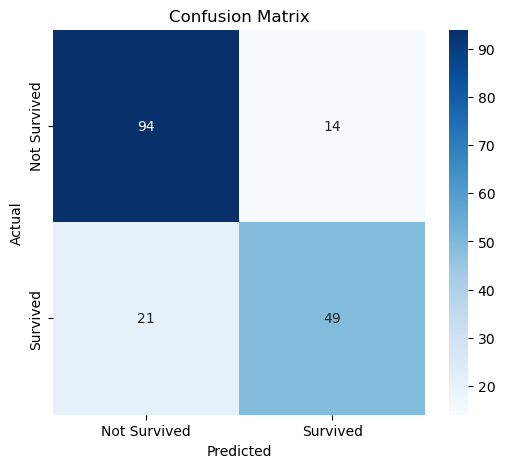

In [20]:
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
# oh don't mind this, just trying to pay attention to the shape...almost mind boggling how 20% is used effectively to test
df.shape

(889, 9)